In [1]:
using TaylorSeries
using PyPlot

INFO: Loading help data...


Modelemos la red: 
$$N_1 \rightarrow ^+N_2 \rightarrow ^+ N3 $$ 

por 

$$\tau_1 \ddot{x_1}+\dot{x_1}=\omega_1+ A_1 cos(x_1)+\sigma(t) $$

$$\tau_2 \ddot{x_2}+\dot{x_2}=\omega_2+ A_2 cos(x_2)+A_3cos(x_1+\phi_{12})$$

$$\tau_3 \ddot{x_3}+\dot{x_3}=\omega_3+ A_4 cos(x_3)+A_5cos(x_1+\phi_{12})+A_6cos(x_2+\phi_{23})$$

hacemos los cambios de variables $u=\dot{x_1} \ , \ v=\dot{x_2} \ , \ w=\dot{x_3}$ para obtener solo ecuaciones de primer orden:

$$\dot{x_1}=u$$

$$\tau_1 \dot{u}=-\dot{x_1}+\omega_1+ A_1 cos(x_1)+\sigma(t)$$

$$\dot{x_2}=v$$


$$ \tau_2 \dot{v}=-\dot{x_2}+\omega_2+ A_2 cos(x_2)+A_3cos(x_1+\phi_{12})$$

$$\dot{x_3}=w$$

$$\tau_3 \dot{w}=-\dot{x_3}+\omega_3+ A_4 cos(x_3)+A_5cos(x_1+\phi_{12})+A_6cos(x_2+\phi_{23})$$

In [138]:
function step{T<:Number}(x::Taylor1{T},eps::T)
    orden=length(x.coeffs)
    hs=Number[]
    for i in 1:orden #esto lo hacemos para evitar problemas con los coeficientes de Taylor que 
        #son cero
        if x.coeffs[i]!=0
            push!(hs,x.coeffs[i])
        end 
    end 
    orden=length(hs)
    p1=1/orden
    p2=1/(orden-1)
    den1=hs[orden]
    den2=hs[orden-1]
    h1=(abs(eps/den1))^p1
    h2=(abs(eps/den2))^p2
    h=min(h1,h2)
    #println(hs)

    return h
end 
    

step (generic function with 1 method)

In [139]:
function d{T<:Real}(x::Taylor1{T}) # La función pide un Taylor
    res=(x+((x^2)^0.5))/2.0
    return res
#end    
#function positive{T<:Number}(x::Taylor1{T})
#    obj=(x+(x^2)^0.5)/2
 #   return obj
end 

d (generic function with 1 method)

In [140]:
function tanh(x::Taylor1)
     ap1 = exp(2.0*(x))
    res1 = (ap1-1.0)/(ap1+1.0)
    return res1
end 

tanh (generic function with 2 methods)

In [141]:
function tanh(x::Number)
     ap1 = exp(2.0*(x))
    res1 = (ap1-1.0)/(ap1+1.0)
    return res1
end 

tanh (generic function with 2 methods)

In [142]:
function xjetN{T<:Number}(arr::Array{T,1},orden::Int,g::Function,σ::Number)
    xjet=zeros(orden)                             #OJO AQUI CON SIGMA
    yjet=zeros(orden)
    zjet=zeros(orden)
    ujet=zeros(orden)
    vjet=zeros(orden)
    wjet=zeros(orden)
    xjet[1]=arr[1] #cond. iniciales
    yjet[1]=arr[2]
    zjet[1]=arr[3]
    ujet[1]=arr[4]
    vjet[1]=arr[5]
    wjet[1]=arr[6]
    fx=zeros(orden)
    fy=zeros(orden)
    fz=zeros(orden)
    fu=zeros(orden)
    fv=zeros(orden)
    fw=zeros(orden)
    for k in 1:orden-1
        ax=Taylor1(xjet)
        ay=Taylor1(yjet)
        az=Taylor1(zjet)
        au=Taylor1(ujet)
        av=Taylor1(vjet)
        aw=Taylor1(wjet)
        bx,by,bz,bu,bv,bw=g(ax,ay,az,au,av,aw,σ)
        
        fx[k]=bx.coeffs[k]
        fy[k]=by.coeffs[k]
        fz[k]=bz.coeffs[k]
        fu[k]=bx.coeffs[k]
        fv[k]=by.coeffs[k]
        fw[k]=bz.coeffs[k]
        
        xjet[k+1]=fx[k]/k
        yjet[k+1]=fy[k]/k
        zjet[k+1]=fz[k]/k
        ujet[k+1]=fu[k]/k
        vjet[k+1]=fv[k]/k
        wjet[k+1]=fw[k]/k
    end 
    xaprox=Taylor1(xjet,orden)
    yaprox=Taylor1(yjet,orden)
    zaprox=Taylor1(zjet,orden)
    uaprox=Taylor1(ujet,orden)
    vaprox=Taylor1(vjet,orden)
    waprox=Taylor1(wjet,orden)
    return xaprox,yaprox,zaprox,uaprox,vaprox,waprox
end 
    
   

xjetN (generic function with 1 method)

In [143]:
 function integrate{T<:Number}(initial::Array{T,1},orden::Int,g::Function,tmax::T,eps::T)
    t=T[]
    xsolutions=T[]
    ysolutions=T[]
    zsolutions=T[]
    usolutions=T[]
    vsolutions=T[]
    wsolutions=T[]
    t0=initial[1]
    push!(t,initial[1]) #añadimos las condicioens inicales a los arreglos
    push!(xsolutions,initial[2])
    push!(ysolutions,initial[3])  
    push!(zsolutions,initial[4])
    push!(usolutions,initial[5])
    push!(vsolutions,initial[6])  
    push!(wsolutions,initial[7])
   
    i=0
    σ=0.5
    
    while t0<tmax 
        i=i+1
        arregloaux=[xsolutions[i],ysolutions[i],zsolutions[i],usolutions[i],vsolutions[i],wsolutions[i]]
        xaprox,yaprox,zaprox,uaprox,vaprox,waprox =xjetN(arregloaux,orden,g,σ)
        h=step(xaprox,eps)
   
        t0=t0+h
        xaux=evaluate(xaprox,h)
        yaux=evaluate(yaprox,h)
        zaux=evaluate(zaprox,h)
        uaux=evaluate(uaprox,h)
        vaux=evaluate(vaprox,h)
        waux=evaluate(waprox,h)
        
        push!(t,t0)
        push!(xsolutions,xaux) 
        push!(ysolutions,yaux) 
        push!(zsolutions,zaux)
        push!(usolutions,uaux) 
        push!(vsolutions,vaux) 
        push!(wsolutions,waux)
        
    end 
    #println("h total es ",contador)
    return t,xsolutions,ysolutions,zsolutions,usolutions,vsolutions,wsolutions
end 
    

integrate (generic function with 1 method)

In [164]:
function threeneurons_2ord(x::Taylor1,y::Taylor1,z::Taylor1,u::Taylor1,v::Taylor1,w::Taylor1,σ::Number)
    f1=u
    f2=v
    f3=w
    ω1=5.
    ω2=1.0
    ω3=0.9
    phase12=0.4
    phase23=0.2
    f4=(-u+ω1+cos(x)+σ)*0.6
    f5=(-v+ω2-cos(y)+d(cos(x-phase12)))*15
    f6=(-w+ω3+cos(z)d(cos(x+phase12)+cos(y+phase23)))*150
    return f1,f2,f3,f4,f5,f6
end 

threeneurons_2ord (generic function with 1 method)

In [165]:
initial_cond=[0.0,-π,-π,-π,-π,-π,-π]
t,x,y,z,u,v,w=integrate(initial_cond,12,threeneurons_2ord,100.0,1e-10);

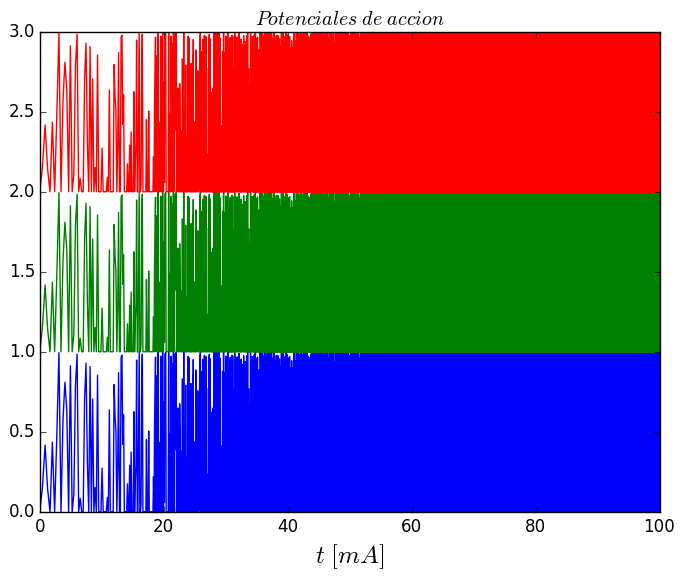

In [166]:
cosx=cos(x)
cosy=cos(y)
cosz=cos(z)
   [cosx[i]=(cosx[i]+(cosx[i]^2)^0.5)/2 for i in 1:length(t)]
    #[cosu[i]=(cosu[i]+(cosu[i]^2)^0.5)/2+1 for i in 1:length(t)]
    [cosy[i]=(cosy[i]+(cosy[i]^2)^0.5)/2+1 for i in 1:length(t)]
    [cosz[i]=(cosz[i]+(cosz[i]^2)^0.5)/2+2 for i in 1:length(t)]

plot(t,cosx,"b")

plot(t,cosy,"g")

plot(t,cosz,"r")
title(L"Potenciales \ de \ accion")
xlabel(L"t \ [mA]",size=18)
xlim([0,100]);

###Observación:
Se jugaron con los parametros de este modelo para muchas combinaciones distintas de $\omega_i,A_i,\phi_{ij},\tau_i$ y los resultados para casi todas las integraciones realizadas mostraban gráficas de esa misma forma. Paraciera que este modelo unicamente muestra como reaciona una de las primeras neuronas ante los estímulos externos y que las otras dos neuronas responden prácticamente igual. Mi observación es que no es un buen modelo por que no se espera este comprtamiento de las neuronas simplemente por el hecho de que los desfasamientos deben verse traducidos en que los potenciales de accion para algunas de las neuronas de la red deben de producirse en diferentes tiempos.
Ahora se considera que solo la neurona de en medio cuya fase es la fase $y(t)$ tiene derivada a segundo orden y que las fases $x(t)$ y $z(t)$ se describen a primer orden.

El sistema de ecuaciones a resolver aquí será:
$$ \dot{x}=\omega_1+ A_1 cos(x_1)+\sigma(t) $$

$$ \ddot{y}=\omega_2+ A_2 cos(y)+A_3cos(x+\phi_{12})$$

$$\dot{z}=\omega_3+ A_4 cos(z)+A_5cos(x+\phi_{12})+A_6cos(y+\phi_{23})$$

hacemos el cambio de variables $u=\dot{y} $ para obtener solo ecuaciones de primer orden:

$$\dot{x}=\omega_1+ A_1 cos(x)+\sigma(t)$$

$$\dot{u}=\omega_2+ A_2 cos(y)++a_3cos(x+\phi_{12})$$

$$\dot{y}=u$$

$$ \dot{z}=\omega_3+ A_4 cos(z)+A_5cos(x+\phi_{12})+A_6cos(y+\phi_{23})$$



In [12]:
function xjetN4{T<:Number}(arr::Array{T,1},orden::Int,g::Function,σ::Number) 
    xjet=zeros(orden)
    ujet=zeros(orden)#OJO AQUI CON SIGMA
    yjet=zeros(orden)
    zjet=zeros(orden)
  
    xjet[1]=arr[1] #cond. iniciales
    ujet[1]=arr[2]
    yjet[1]=arr[3]
    zjet[1]=arr[4]
    
  
    fx=zeros(orden)
    fu=zeros(orden)
    fy=zeros(orden)
    fz=zeros(orden)
   
    for k in 1:orden-1
        ax=Taylor1(xjet)
        au=Taylor1(ujet)
        ay=Taylor1(yjet)
        az=Taylor1(zjet)
       
        bx,bu,by,bz=g(ax,au,ay,az,σ)
        
        fx[k]=bx.coeffs[k]
        fu[k]=bu.coeffs[k]
        fy[k]=by.coeffs[k]
        fz[k]=bz.coeffs[k]
        
        
        xjet[k+1]=fx[k]/k
        ujet[k+1]=fu[k]/k
        yjet[k+1]=fy[k]/k
        zjet[k+1]=fz[k]/k
        
    end 
    xaprox=Taylor1(xjet,orden)
    uaprox=Taylor1(ujet,orden)
    yaprox=Taylor1(yjet,orden)
    zaprox=Taylor1(zjet,orden)
  
    return xaprox,uaprox,yaprox,zaprox
end 

 
   

xjetN4 (generic function with 1 method)

In [110]:
sigma(t)=(0.05*t) #estímulo no cosntante

 function integrate3_4{T<:Number}(initial::Array{T,1},orden::Int,g::Function,tmax::T,eps::T)
    t=T[]
    xsolutions=T[]
    usolutions=T[]
    ysolutions=T[]
    zsolutions=T[]

    t0=initial[1]
    push!(t,initial[1]) #añadimos las condicioens inicales a los arreglos
    push!(xsolutions,initial[2])
    push!(usolutions,initial[3])
    push!(ysolutions,initial[4])  
    push!(zsolutions,initial[5])

   
    i=0
    #σ=0.5
    
    while t0<tmax 
        i=i+1
        σ=sigma(t0)
        arregloaux=[xsolutions[i],usolutions[i],ysolutions[i],zsolutions[i]]
        xaprox,uaprox,yaprox,zaprox =xjetN4(arregloaux,orden,g,σ)
        h=step(xaprox,eps)
   
        t0=t0+h
        xaux=evaluate(xaprox,h)
        uaux=evaluate(uaprox,h)
        yaux=evaluate(yaprox,h)
        zaux=evaluate(zaprox,h)
      
        
        push!(t,t0)
        push!(xsolutions,xaux)
        push!(usolutions,uaux)
        push!(ysolutions,yaux) 
        push!(zsolutions,zaux)
     
        
    end 
    #println("h total es ",contador)
    return t,xsolutions,usolutions,ysolutions,zsolutions
end 
 

integrate3_4 (generic function with 1 method)

In [135]:
function threeneurons_2dord1(x::Taylor1,u::Taylor1,y::Taylor1,z::Taylor1,σ::Number)
    ω1=3.0
    ω2=0.1
    ω3=0.15
    phase12=14.0
    phase23=5.
    fx=ω1+cos(x)-5.*cos(y)-cos(z)+σ #este es el termino x dos puntos osea u punto
    fu=0.5*(ω2+cos(y)-(cos(x+phase12)))
    fy=0.1*u
    fz=ω3+cos(z)+cos(x+phase12)+cos(y+phase23)
    return fx,fu,fy,fz
end 

threeneurons_2dord1 (generic function with 1 method)

In [136]:
function graficar2_1{T<:Number}(inicial_conditions::Array{T,1},orden::Int,g::Function,tmax::T,eps::T)
    t,x,u,y,z=integrate3_4(inicial_conditions,orden,g,tmax,eps)
    cosx=cos(x)
    cosu=cos(u)
    cosy=cos(y)
    cosz=cos(z)
    [cosx[i]=(cosx[i]+(cosx[i]^2)^0.5)/2 for i in 1:length(t)]
    [cosu[i]=(cosu[i]+(cosu[i]^2)^0.5)/2+1 for i in 1:length(t)]
    [cosy[i]=(cosy[i]+(cosy[i]^2)^0.5)/2+2 for i in 1:length(t)]
    [cosz[i]=(cosz[i]+(cosz[i]^2)^0.5)/2+3 for i in 1:length(t)]
    plot(t,cosx,"b")
    plot(t,cosu,"k")
    plot(t,cosy,"g")
    plot(t,cosz,"r")
    xlim([0,tmax])
    grid("on");
end 
    

graficar2_1 (generic function with 2 methods)

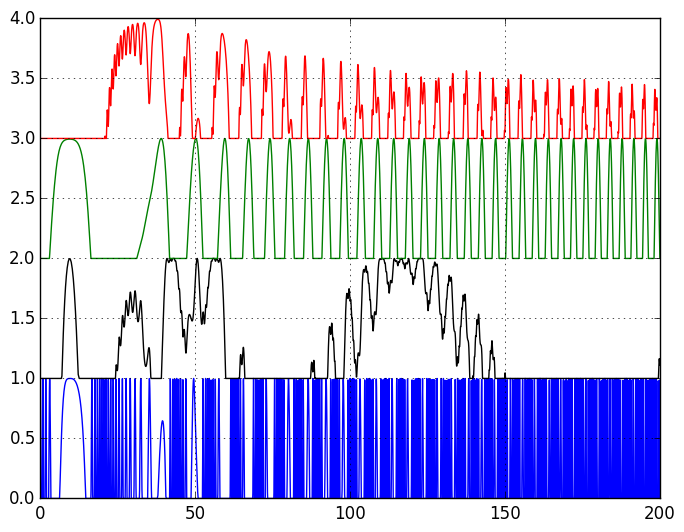

In [137]:
inicon=[-1.,-π,-π,-π,π]
graficar2_1(inicon,15,threeneurons_2dord1,200.,1e-15)

## Observación.
La gráfica anterior se modificó para muchos sitemas de ecuaciones  variando todos sus parámetros como frecuencias, desfasamientos y forma de los estímulos en exitación y  no parece que sea un buen modelo pues no simula lo que esperamos de los potenciales de acción no cambian su amplitud o su forma como se ve en la gráfica amnterior.

Debido a estos resultados de ahora en adelante trabajaremos **únicamente** con redes de neuronas cuyas fases se modelen con ecuaciones diferenciales a **primer orden**.

#----------------------------------------------------------------------------------

#Redes modeladas utilizando solamente ec. dif. de primer orden.
 La red se modela aquí con:
$$
 ω1=3.0
    ω2=1.0
    ω3=1.5
    phase12=14.0
    phase23=5.
    f1=ω1+cos(x)+σ
    f2=ω2+cos(y)-(cos(x+phase12))
    f3=ω3+cos(z)+cos(x+phase12)+cos(y+phase23)

In [5]:
function xjetN{T<:Number}(arr::Array{T,1},orden::Int,g::Function,σ::Number) #AQUI ESTÁ MI ERROR!!!! ENCONTRARLO!!
    xjet=zeros(orden)                             #OJO AQUI CON SIGMA
    yjet=zeros(orden)
    zjet=zeros(orden)
  
    xjet[1]=arr[1] #cond. iniciales
    yjet[1]=arr[2]
    zjet[1]=arr[3]
  
    fx=zeros(orden)
    fy=zeros(orden)
    fz=zeros(orden)
   
    for k in 1:orden-1
        ax=Taylor1(xjet)
        ay=Taylor1(yjet)
        az=Taylor1(zjet)
       
        bx,by,bz=g(ax,ay,az,σ)
        
        fx[k]=bx.coeffs[k]
        fy[k]=by.coeffs[k]
        fz[k]=bz.coeffs[k]
        
        
        xjet[k+1]=fx[k]/k
        yjet[k+1]=fy[k]/k
        zjet[k+1]=fz[k]/k
        
    end 
    xaprox=Taylor1(xjet,orden)
    yaprox=Taylor1(yjet,orden)
    zaprox=Taylor1(zjet,orden)
  
    return xaprox,yaprox,zaprox
end 

 function integrate{T<:Number}(initial::Array{T,1},orden::Int,g::Function,tmax::T,eps::T)
    t=T[]
    xsolutions=T[]
    ysolutions=T[]
    zsolutions=T[]

    t0=initial[1]
    push!(t,initial[1]) #añadimos las condicioens inicales a los arreglos
    push!(xsolutions,initial[2])
    push!(ysolutions,initial[3])  
    push!(zsolutions,initial[4])

   
    i=0
    σ=0.5
    
    while t0<tmax 
        i=i+1
        arregloaux=[xsolutions[i],ysolutions[i],zsolutions[i]]
        xaprox,yaprox,zaprox =xjetN(arregloaux,orden,g,σ)
        h=step(xaprox,eps)
   
        t0=t0+h
        xaux=evaluate(xaprox,h)
        yaux=evaluate(yaprox,h)
        zaux=evaluate(zaprox,h)
      
        
        push!(t,t0)
        push!(xsolutions,xaux) 
        push!(ysolutions,yaux) 
        push!(zsolutions,zaux)
     
        
    end 
    #println("h total es ",contador)
    return t,xsolutions,ysolutions,zsolutions
end 
    
   
   

integrate (generic function with 1 method)

In [6]:

function graficar{T<:Number}(arr::Array{T,1},orden::Int,g::Function,tmax::T,eps::T)
    t,x,y,z=integrate(arr,orden,g,tmax,eps)
    cosx=cos(x)
    cosy=cos(y)+2
    cosz=cos(z)+4

    plot(t,cosx,"b")

    plot(t,cosy,"g")

    plot(t,cosz,"r")
    xlim([0,tmax])
    end ;

In [7]:
function threeneurons_1ord(x::Taylor1,y::Taylor1,z::Taylor1,σ::Number)
    ω1=3.0
    ω2=1.0
    ω3=1.5
    phase12=14.0
    phase23=5.
    f1=ω1+cos(x)+σ
    f2=ω2+cos(y)-(cos(x+phase12))
    f3=ω3+cos(z)+cos(x+phase12)+cos(y+phase23)
    return f1,f2,f3
end 

threeneurons_1ord (generic function with 1 method)

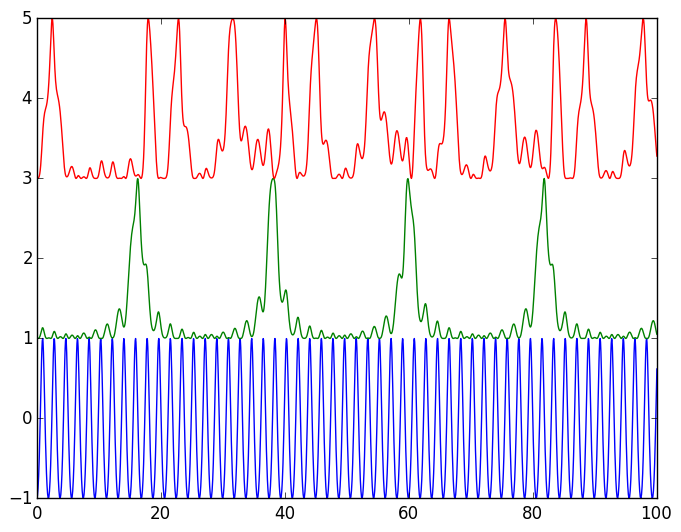

In [8]:
initial_cond=[0.0,-π,-π,-π]
graficar(initial_cond,15,threeneurons_1ord,100.0,1e-15);


#Estímulo no constante

In [9]:
sigma(t)=sin(5.0*t) #estímulo no cosntante

 function integrate2{T<:Number}(initial::Array{T,1},orden::Int,g::Function,tmax::T,eps::T)
    t=T[]
    xsolutions=T[]
    ysolutions=T[]
    zsolutions=T[]

    t0=initial[1]
    push!(t,initial[1]) #añadimos las condicioens inicales a los arreglos
    push!(xsolutions,initial[2])
    push!(ysolutions,initial[3])  
    push!(zsolutions,initial[4])

   
    i=0
    #σ=0.5
    
    while t0<tmax 
        i=i+1
        σ=sigma(t0)
        arregloaux=[xsolutions[i],ysolutions[i],zsolutions[i]]
        xaprox,yaprox,zaprox =xjetN(arregloaux,orden,g,σ)
        h=step(xaprox,eps)
   
        t0=t0+h
        xaux=evaluate(xaprox,h)
        yaux=evaluate(yaprox,h)
        zaux=evaluate(zaprox,h)
      
        
        push!(t,t0)
        push!(xsolutions,xaux) 
        push!(ysolutions,yaux) 
        push!(zsolutions,zaux)
     
        
    end 
    #println("h total es ",contador)
    return t,xsolutions,ysolutions,zsolutions
end 
    
function graficar2{T<:Number}(arr::Array{T,1},orden::Int,g::Function,tmax::T,eps::T)
    t,x,y,z=integrate2(arr,orden,g,tmax,eps)
cosx=cos(x)
cosy=cos(y)+2
cosz=cos(z)+4

plot(t,cosx,"b")

plot(t,cosy,"g")

plot(t,cosz,"r")
xlim([0,tmax])
    end ;
   

In [7]:
function threeneurons_1ord(x::Taylor1,y::Taylor1,z::Taylor1,σ::Number)
    ω1=3.0
    ω2=1.0
    ω3=1.5
    phase12=14.0
    phase23=5.
    f1=ω1+cos(x)+σ
    f2=ω2+cos(y)-(cos(x+phase12))
    f3=ω3+cos(z)+cos(x+phase12)+cos(y+phase23)
    return f1,f2,f3
end 

threeneurons_1ord (generic function with 1 method)

In [132]:
function threeneurons_1ord2(x::Taylor1,y::Taylor1,z::Taylor1,σ::Number)
    ω1=3.0
    ω2=1.0
    ω3=1.5
    phase12=-14.0
    phase23=-5.
    f1=ω1+cos(x)+σ-10.*cos(y)
    f2=ω2+cos(y)-cos(x+phase12)
    f3=ω3+cos(z)+(cos(y+phase23))#+(cos(x+σ))#+phase12)
    return f1,f2,f3
end 

threeneurons_1ord2 (generic function with 1 method)

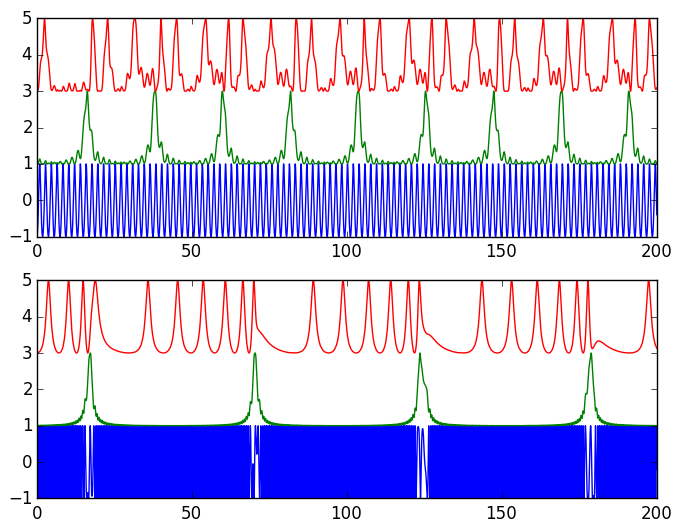

In [133]:
incond=[0.0,-π,-π,-π]
subplot(211)
graficar(incond,10,threeneurons_1ord,200.0,1e-15);
subplot(212)
graficar2(incond,10,threeneurons_1ord2,200.,1e-15) #estímulo no constante;